### Saudi Aqar prediction


The saudi real estate market is a fast-growing industry <br>
This dataset is collected and scrapped from Aqar website. The chosen cities are Riyadh, Jeddah, Dammam, and Al-Khobar. This dataset focused on the rental houses. It contains information about 3000 properties from various districts



#### | Names of columns with description and type:

| Columns     | Description                                                        |  
|-------------|:-------------:                                                     |
| city        |  city where house locate in                                        | 
| district    |  district where house locate in                                    |   
| front       |  What is the house front is north, west .. etc                     |    
| size        |  size in m^2                                                       |  
| propertyage |  property age for the house                                        | 
| bedrooms    |  number of bedrooms                                                | 
| bathrooms   |  number of bathrooms                                               | 
| livingrooms |  number of livingrooms                                             | 
| kitchen     |  show whether the house have a kitchen or not                      | 
| garage      |  show whether the house have a garage or not                       | 
| driverroom  |  show whether the house have a driverroom or not                   | 
| maidroom    |  show whether the house have a maid_room or not                    | 
| furnished   |  show whether the house is furnished or not                        | 
| ac          |  show whether the house have a ac or not                           | 
| roof        |  show whether the house have a space for roof on top or not        | 
| pool        |  show whether the house have a pool or not                         | 
| frontyard   |  show whether the house have a frontyard or not                    | 
| basement    |  show whether the house have a basement or not                     | 
| duplex      |  show whether the house is a duplex or not                         | 
| stairs      |  show whether the house have a stairs or not                       |
| elevator    |  show whether the house have an elevator or not                    |
| fireplace   |  show whether the house have a fireplace or not                    |
| price       |  show the price of the house                                       |
| details     |  shows any additional details from the house owner about the house |

### 1- Importing Libraries:
These are the most important libraries we need for our case

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy import stats 

### 2- Importing dataset:

In [172]:
H_data = pd.read_csv('Housing.csv')

### 3- Exploratory Data Analysis:
First, we want to take a look on our dataset, catagories & observations

In [173]:
H_data.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


- Getting information about our data, such as the shape of the data (rows & columns), name of columns we have, type of observations in columns, & count of non-null values

In [174]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2974 non-null   int64 
 1   city          2974 non-null   object
 2   district      2974 non-null   object
 3   front         2974 non-null   object
 4   size          2974 non-null   int64 
 5   property_age  2974 non-null   int64 
 6   bedrooms      2974 non-null   int64 
 7   bathrooms     2974 non-null   int64 
 8   livingrooms   2974 non-null   int64 
 9   kitchen       2974 non-null   int64 
 10  garage        2974 non-null   int64 
 11  driver_room   2974 non-null   int64 
 12  maid_room     2974 non-null   int64 
 13  furnished     2974 non-null   int64 
 14  ac            2974 non-null   int64 
 15  roof          2974 non-null   int64 
 16  pool          2974 non-null   int64 
 17  frontyard     2974 non-null   int64 
 18  basement      2974 non-null   int64 
 19  duplex

Exploring how many columns and rows we have by .shape command

In [175]:
H_data.shape

(2974, 25)

- Getting statisitical summary:

In [176]:
H_data.describe()

,Unnamed: 0,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,...,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2.974000e+03
mean,1858.833557,366.525891,5.133490,5.087761,4.604573,2.238399,0.911231,0.799597,0.492939,0.792872,...,0.563551,0.519839,0.161399,0.803968,0.033961,0.495965,0.816745,0.079018,0.184600,8.724988e+04
std,1075.717674,209.059809,7.664641,1.242549,0.701490,0.915901,0.284458,0.400370,0.500034,0.405317,...,0.496028,0.499690,0.367960,0.397060,0.181159,0.500068,0.386940,0.269812,0.388038,7.230267e+04
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,930.250000,270.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.225000e+04
50%,1865.500000,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,2789.750000,400.000000,8.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,3717.000000,5000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


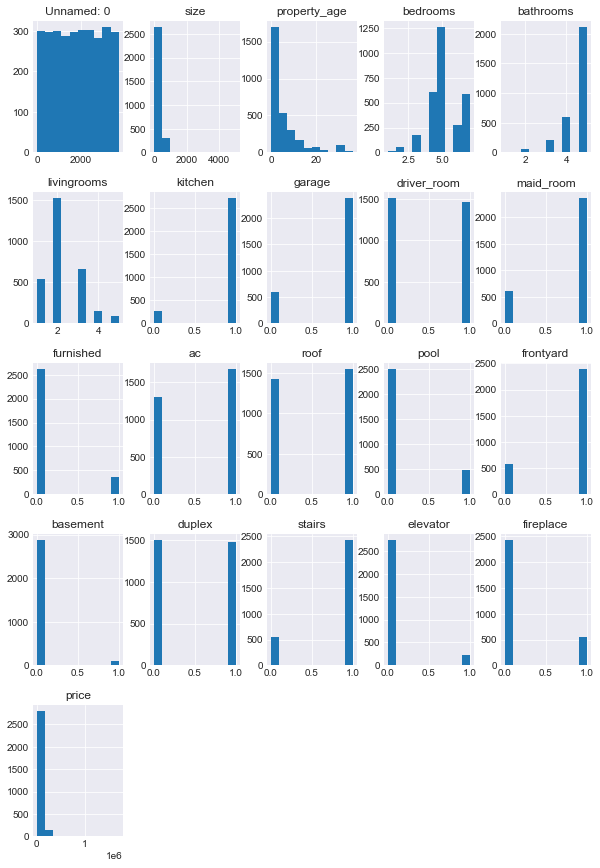

In [177]:
viz = H_data
viz.hist(figsize = (10,15))
plt.show() 

- We noticed earlier that there are some null values in the details column, so we run the below code to count them
- As the null values are in the details column, and when we explored the dataset, we found that the details column is a descriptive column that would not hurt our anlaysis. Thus, we can continue our analysis without droping them.

In [178]:
H_data.isnull().sum()

Unnamed: 0       0
city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         62
dtype: int64

- Here we want to find the relation between the number of bedrooms and the price regardless of the city the unit is in:

In [179]:
H_data.groupby(['bedrooms']).price.agg(['mean'])

,mean
bedrooms,
1,68900.000000
2,64741.379310
3,99874.157303
4,94525.368249
5,88825.397456
6,74768.840580
7,80833.619211


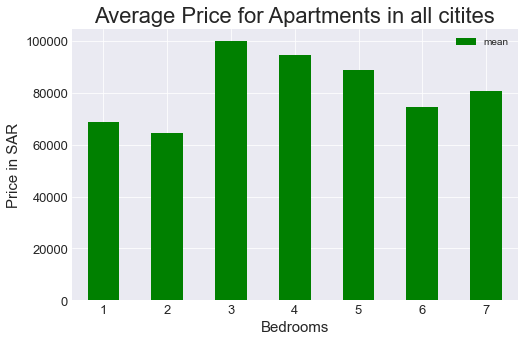

In [180]:
Bedrooms_prices = H_data.groupby(['bedrooms']).price.agg(['mean'])
ax = Bedrooms_prices.plot(kind='bar', figsize=(8,5), color="green", fontsize=13)
plt.style.use('seaborn-darkgrid')
plt.title('Average Price for Apartments in all citites', fontsize=22)
plt.xlabel('Bedrooms', fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel('Price in SAR', fontsize = 15)
plt.show()


- Here, we fruther more explore the relation between number of bedrooms and the price, but here we we even compare the cities in which the apartments are located:

In [181]:
# Average price for aapartment types in all cities
# We also see that الخبر has no 2bed apts listed in our data
H_data.groupby(['city', "bedrooms"]).price.agg(['mean'])

mean
city    bedrooms               
 الخبر  1          65000.000000
        3          67600.000000
        4         105057.692308
        5          73528.804348
        6          62796.296296
        7          70238.095238
 الدمام 1          97500.000000
        2          80000.000000
        3          62125.000000
        4          51543.750000
        5          59750.000000
        6          73027.027027
        7          70507.874016
 الرياض 1          61500.000000
        2          70400.000000
        3         106194.444444
        4          92800.000000
        5          94152.976190
        6         103584.000000
        7          92377.358491
 جدة    1          60000.000000
        2          63903.846154
        3         119813.114754
        4         106902.343750
        5         122514.792899
        6          95629.629630
        7         109020.618557

- In the below bar plot, we are comparing the average number of bedrooms in each city, Riyadh, Jeddah, Dammam, Alkhobar.

Text(0.5, 1.0, 'Average Number of Bedrooms in each City')

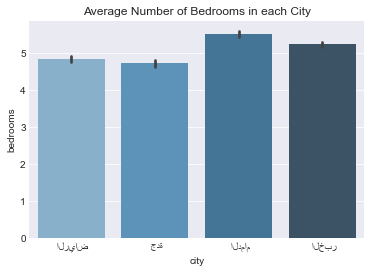

In [182]:
#plt.style.use('seaborn-darkgrid')
sns.barplot(data = H_data, x = 'city', y = 'bedrooms',palette="Blues_d")
plt.title('Average Number of Bedrooms in each City') 

- Heat map to find the correlation between the different features

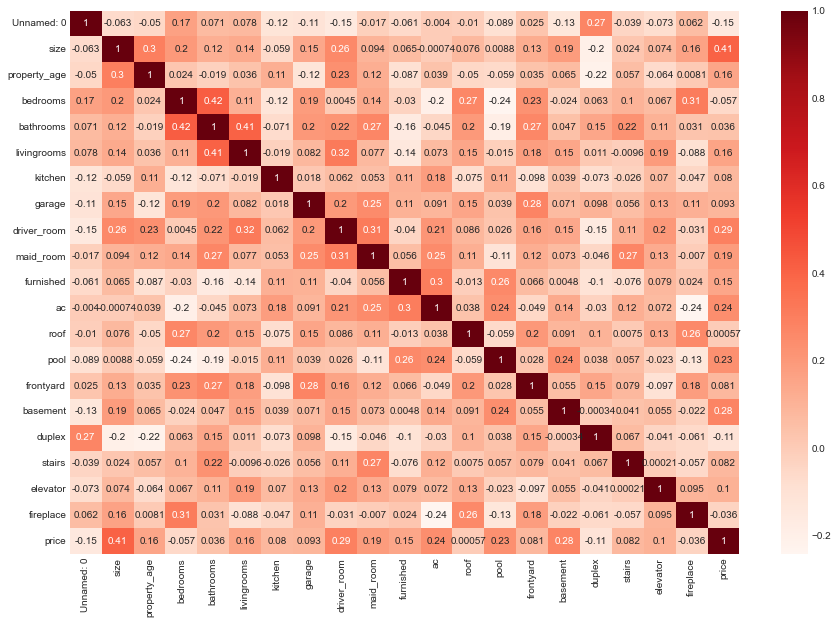

In [183]:
plt.figure(figsize=(15,10))
cor = H_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show(); 

- We found that highest corollation is between size and price 

### 4- Data Cleaning:
- First, we noticed a column that has no use in our data, so we decided to drop this column:

In [184]:
H_data.drop('Unnamed: 0', inplace=True, axis=1)

- We also noticed prices that are lower than usual. Then during exploring their details, we found that they were actually monthly prices placed in the price column without being edited as annual prices. 

### Check the rent due frequnecy

- In the details column, some of the rows have information about the rent due frequency, monthly or daily. 
- Therefore, we added a new column to classify the rent frequency IF it is clearly mentioned in the details column. 

In [185]:
def fixRent(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('شهر') != -1 or details.find('شهري') != -1 or details.find('بالشهر') != -1):
        rent = 'Monthly'
    elif( details.find('يوم') != -1  or details.find('يومي') != -1 or details.find('باليوم') != -1 ):
        rent = 'Daily'
    else:
        rent = 'Unkown'
        
    return rent

H_data.loc[:,'Rent Frequnecy'] = H_data.loc[:,'details'].apply(fixRent)

In [186]:
H_data.groupby(['Rent Frequnecy']).size()

Rent Frequnecy
Daily         5
Monthly     102
Unkown     2867
dtype: int64


- Therefore, we defined fixRentAmount formula to look for the observations below 10,000 SAR and multiply them by 12 to get their annual price as most of the observations.

In [187]:
def fixRentAmount(price):

    if( price < 10000):
        price = price * 12
    return price

H_data.loc[:,'price'] = H_data.loc[:,'price'].apply(fixRentAmount)

In [188]:
H_data.loc[:,['price',"details",'Rent Frequnecy']]

,price,details,Rent Frequnecy
0,40000,درج داخلي للايجار التوالصل 0538143083,Unkown
1,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,Unkown
2,39600,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,Monthly
3,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,Unkown
4,80000,الجزء الثالث والاخير للتصوير\n================...,Unkown
...,...,...,...
2969,33000,دبلكس الاجار جديد ثلاثه ادوار الحي السابع كل ٦...,Monthly
2970,50000,فيلا دورين درج داخلي مجددة,Unkown
2971,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...,Unkown
2972,35000,فيلا للإيجار على زاوية\nمطبخ راكب \n٤ غرف نوم ...,Monthly


- When we took a further look on the Daily rentals, we decided to not fix them to make them monthly or yearly. For example, if we do so in the first unit in the below table, we would have 3000 x 365 = 1,095,000 SAR and it would be an outlier value that would a negative impact on our over all analysis.
- Thus, We decided to keep it with no change in our data as it would be much closer to our cheapest rent price than to the most expensive one. 

In [189]:
H_data[H_data['Rent Frequnecy'] == 'Daily']

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Rent Frequnecy
363,جدة,حي الزمرد,شمال,350,0,4,4,1,1,1,...,1,1,0,0,1,0,0,36000,فيلا دورين مكونة من 4 غرف نوم و 4 دورات مياه و...,Daily
1279,جدة,حي الشاطئ,غرب,350,2,3,4,2,1,1,...,1,1,0,1,1,0,0,30000,فيلا مؤثثه نظيفه جدا للايجار اليومي \nبالسعر ا...,Daily
1826,الرياض,حي العارض,شرق,300,0,5,5,2,1,1,...,0,1,0,1,1,0,1,130000,بسم الله مشاء الله تبارك الله🌱🌱\nيوجد لدينا فل...,Daily
2411,جدة,حي الزمرد,جنوب,550,7,4,4,3,1,1,...,1,1,0,1,0,0,1,24000,فيلا للايجار اليومي بخصوصية تامه,Daily
2660,الدمام,حي طيبة,شمال,370,2,5,5,2,1,0,...,0,0,0,1,0,0,0,50000,للايجار دبلوكس مساحة ٣٧٠ في حي طيبة مطبح راكب ...,Daily


In [190]:
Daily_rent = H_data[H_data['Rent Frequnecy'] == 'Daily']
# the prices of the daily rents has been multiplied x12 to fix the monthly prices and to avoid having outliers in our analysis. 
# the actual daily price can bel caluclated using this code: 
Daily_rent['price'].replace([36000, 30000, 130000, 24000, 50000], [36000/12, 30000/12, 130000/12, 24000/12, 50000/12], inplace=True)
# but we are not going to apply on the actual data as the daily rents are only 5 units
# and it would harm our overall model if it is way lower than the minimum rent value.
Daily_rent

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_5610/3462310299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily_rent['price'].replace([36000, 30000, 130000, 24000, 50000], [36000/12, 30000/12, 130000/12, 24000/12, 50000/12], inplace=True)


,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Rent Frequnecy
363,جدة,حي الزمرد,شمال,350,0,4,4,1,1,1,...,1,1,0,0,1,0,0,3000.000000,فيلا دورين مكونة من 4 غرف نوم و 4 دورات مياه و...,Daily
1279,جدة,حي الشاطئ,غرب,350,2,3,4,2,1,1,...,1,1,0,1,1,0,0,2500.000000,فيلا مؤثثه نظيفه جدا للايجار اليومي \nبالسعر ا...,Daily
1826,الرياض,حي العارض,شرق,300,0,5,5,2,1,1,...,0,1,0,1,1,0,1,10833.333333,بسم الله مشاء الله تبارك الله🌱🌱\nيوجد لدينا فل...,Daily
2411,جدة,حي الزمرد,جنوب,550,7,4,4,3,1,1,...,1,1,0,1,0,0,1,2000.000000,فيلا للايجار اليومي بخصوصية تامه,Daily
2660,الدمام,حي طيبة,شمال,370,2,5,5,2,1,0,...,0,0,0,1,0,0,0,4166.666667,للايجار دبلوكس مساحة ٣٧٠ في حي طيبة مطبح راكب ...,Daily


### Accomodation Types
- While wr were exploring our data, we found that there are no classification for the kind of unit. Meaning, the dataset does not have a column or a catagory that specify the type of the listed units, is it a house, apartment, or a whole floor? 
- Therefore, we decided to make a new column called "Accomodation Types" that would classify the unit type for us.

In [191]:
def fixTypes(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('شقه') != -1 or  details.find('شقة') != -1):
        rent = 'apartment'  
    elif( details.find('فله') != -1 or details.find('فلة') != -1 or details.find('فيلا') != -1 or details.find('دبلكس') != -1 
        or details.find('دوبلكس') != -1 or details.find('ڤيلا') != -1 or details.find('فلل') != -1 or details.find('دبلوكسين') != -1 
        or details.find('فلا') != -1 or details.find('فيلا ') != -1 or details.find('دبلوكس ') != -1) or details.find('فلا') != -1 :  
        rent = 'house'
    elif( details.find('دور') != -1 or details.find('دور') != -1 ):
        rent = 'floor'
    else:
        rent = 'Unkown'
        
    return rent

H_data.loc[:,'Accommodation Types'] = H_data.loc[:,'details'].apply(fixTypes)

In [192]:
H_data.groupby(['Accommodation Types']).size()

Accommodation Types
Unkown        245
apartment      78
floor         216
house        2435
dtype: int64

In [193]:
H_data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Rent Frequnecy,Accommodation Types
0,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,1,...,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083,Unkown,Unkown
1,جدة,حي بريمان,جنوب,350,0,7,5,2,1,1,...,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,Unkown,house
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,1,0,0,1,0,1,39600,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,Monthly,floor
3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,Unkown,house
4,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,1,...,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...,Unkown,house


- After making the new Accomodation Types column, we want to have further more explained table that is grouped by the units city, district, type, and average size. 
- We can see that regardless of the accomodation type, size in the Saudi market does not rely on the type of unit. From the table below, we see that floor units can have bigger sizes than houses. Thus, we cannot say that houses are always bigger than floor apartments in the Saudi market.
- Accommodatio type is not a factor that would change the unit size in our data

In [194]:
Multi_features1 = H_data.groupby(['city', 'district','Accommodation Types'])['size'].mean().to_frame()
Multi_features1.sample(15)

size
city    district                Accommodation Types             
 الرياض    حي الملقا            apartment             375.000000
           حي ام الحمام الشرقي  house                 600.000000
           حي ظهرة لبن          Unkown                200.000000
           حي الملك فيصل        floor                 375.000000
           حي الفيحاء           house                 536.800000
 جدة       حي ابحر الجنوبية     floor                 250.000000
 الرياض    حي العقيق            house                 630.357143
 جدة       حي الرويس            house                2500.000000
 الرياض    حي السويدي           floor                 250.000000
           حي الاندلس           house                 465.000000
 جدة       حي النعيم            Unkown                300.000000
 الرياض    حي القيروان          house                 371.833333
           حي بدر               floor                 543.333333
           حي الربوة            house                 315.000000
 الدمام    حي الشرق             house                 300.000000

- Having a deeper look on floor units

In [195]:
d_floor = H_data[H_data['Accommodation Types'] == 'floor']
d_floor

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Rent Frequnecy,Accommodation Types
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,1,0,0,1,0,1,39600,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,Monthly,floor
16,الدمام,حي طيبة,شمال غربي,450,4,7,5,2,1,1,...,1,0,0,1,0,1,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...,Unkown,floor
40,الخبر,حي الحزام الاخضر,جنوب,400,4,4,5,2,1,1,...,0,0,1,1,0,0,140000,٤غرف نوم منهم غرفتين ماستر \nمجلس وصاله ومطبخ ...,Unkown,floor
41,الخبر,حي الحزام الاخضر,جنوب,400,4,4,5,2,1,1,...,0,0,1,1,0,0,140000,٤غرف نوم منهم غرفتين ماستر \nمجلس وصاله ومطبخ ...,Unkown,floor
68,الدمام,حي الشاطئ الغربي,شمال,380,0,5,4,1,1,1,...,1,0,0,0,0,0,60000,‏دور ارضي بحي الشاطئ الغربي يتكون من ثلاث غرف ...,Unkown,floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,الخبر,حي اللؤلؤ,غرب,330,0,6,4,2,1,0,...,1,0,1,0,0,1,37000,حوش مجلس خارجي مجلس رجال دورة مياة مجلط صاله ...,Unkown,floor
2852,الدمام,حي طيبة,شمال غربي,450,4,7,5,2,1,1,...,1,0,0,1,0,1,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...,Unkown,floor
2863,الرياض,حي العليا,جنوب غربي,250,0,4,4,4,1,1,...,1,0,0,1,0,0,150000,New house for rent 150.000SR\nNew \n0500069102...,Unkown,floor
2880,الرياض,حي طويق,جنوب غربي,255,4,1,5,2,1,1,...,1,0,0,1,0,0,40000,دور درج صاله مؤثث مكون من مشب ومجلس ومقلط وصا...,Unkown,floor


(0.0, 230340.0)

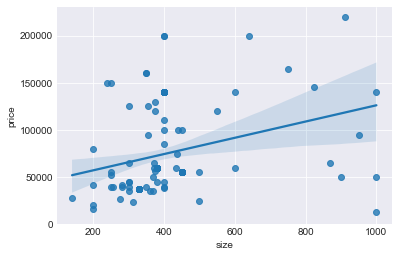

In [196]:
# Engine size as potential predictor variable of price
sns.regplot(x="size", y="price", data=d_floor)
plt.ylim(0,)

#### Correlation between size and price among floor type units
- Here we notice that size does not a significant influnce on the price of the unit as it might be assumed, but this is only among floor type units

In [197]:
d_floor[["size", "price"]].corr()

,size,price
size,1.000000,0.247208
price,0.247208,1.000000


#### Correlation between ac and price among floor type units
- We can infer from the correlation between air condintioner and price that the unit price would actually increase much higher if they have ac than if the unit is bigger in size but does not have an ac system among floor type units.

In [198]:
d_floor[["ac", "price"]].corr()

,ac,price
ac,1.000000,0.630652
price,0.630652,1.000000


#### Correlation between size and price among all accomodation types
- Here we notice that size has a higher impact on price when we find the correlation among all accomodation types

In [199]:
H_data[["size", "price"]].corr()

,size,price
size,1.000000,0.406435
price,0.406435,1.000000


#### Correlation between ac and price among all kind of accomodation types
- Here we see that ac has a much lower impact on price when it is compared to all accomodation types

In [200]:
H_data[["ac", "price"]].corr()

,ac,price
ac,1.000000,0.241455
price,0.241455,1.000000


/Users/nawafalhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

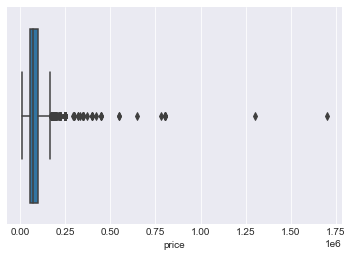

In [201]:
sns.boxplot(H_data['price'])